# Example for a simple neural network

## Trump by maximum color (2 colors)

The inputs to the network are the number of cards of each color. The network should learn to select the color with the largest number of cards of that color.

For a simple example, let us assume that there are 5 cards in total for a player and only 2 colors.

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Exercise: Implement a ML Network to learn trump from features

We would like to train a network to get the trump from some features. (We could use the cards directly, but this is deep learning and we will see more of that in next lesson :-) )

As features we can use the number of cards of a color as before and some of the features from last lecture. For keras all input features should be floating point numbers. Also we need numpy arrays and not pandas. To get the array from a panda, the property `values` can be used.

In [2]:
import pandas as pd
from pathlib import Path
path_to_data = Path('data')
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CQ,CJ,C10,C9,C8,C7,C6,FH,user,trump
0,0,0,0,1,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,53248,6
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,4613,5
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,68780,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,24555,5
4,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,8392,4


Continue as follows:
- Calculate features, 
- add them to the data set
- drop the columns not used
- convert to numpy array
- build a network and train

In [3]:
df = data.groupby('user').size().reset_index(name='counts')
df = df.drop(df[(df["counts"]>800)].index)['user']
data = data.drop(df)
data.drop(data[data.user==0].index, inplace=True)
data.drop('user', axis='columns', inplace=True)
data.head(10)

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4
5,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,5
6,1,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,1
8,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,5
10,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,2
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5


In [4]:
data.trump.value_counts()

6    101401
5     32896
2     29180
3     28965
4     26232
0     22129
1     22108
Name: trump, dtype: int64

In [5]:
data.trump = data.trump.astype('category')
data.trump.cat.rename_categories({0: 'DIAMONDS', 1: 'HEARTS', 2: 'SPADES', 3:'CLUBS',
                                  4: 'OBE_ABE', 5: 'UNE_UFE', 6: 'PUSH', 10: 'PUSH'}, inplace=True)

data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,PUSH
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,PUSH
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,UNE_UFE
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,OBE_ABE
5,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,UNE_UFE


In [6]:
data = data.drop(data[((data.trump == 'PUSH') & (data.index % 3 != 0))].index)  
data.head(15)

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,PUSH
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,UNE_UFE
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,OBE_ABE
5,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,UNE_UFE
6,1,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,PUSH
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,HEARTS
8,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,UNE_UFE
10,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,SPADES
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,UNE_UFE
15,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,OBE_ABE


In [7]:
data.trump.value_counts()

PUSH        33930
UNE_UFE     32896
SPADES      29180
CLUBS       28965
OBE_ABE     26232
DIAMONDS    22129
HEARTS      22108
Name: trump, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

X_train_data = train.drop('trump', axis=1)
X_test_data = test.drop('trump', axis=1)

y_train_data = train.trump
y_test_data = test.trump

In [9]:
y_train_data = pd.get_dummies(y_train_data)
y_test_data = pd.get_dummies(y_test_data)

print(y_train_data.head())
print(y_test_data.head())

        DIAMONDS  HEARTS  SPADES  CLUBS  OBE_ABE  UNE_UFE  PUSH
234296         1       0       0      0        0        0     0
266970         0       0       0      0        0        0     1
107478         0       0       0      0        0        0     1
204759         0       1       0      0        0        0     0
214090         0       0       0      1        0        0     0
        DIAMONDS  HEARTS  SPADES  CLUBS  OBE_ABE  UNE_UFE  PUSH
289446         0       0       0      0        0        0     1
235225         0       0       1      0        0        0     0
21069          0       0       0      0        0        1     0
315515         1       0       0      0        0        0     0
199401         0       0       0      0        0        1     0


In [10]:
X_train = np.array(X_train_data)
X_test = np.array(X_test_data)

y_train = np.array(y_train_data)
y_test = np.array(y_test_data)

In [11]:
from tensorflow import keras

modelDef = keras.Sequential()
modelDef.add(keras.layers.Dense(148, activation='relu', input_shape=[37]))
modelDef.add(keras.layers.Dense(74, activation='relu'))
modelDef.add(keras.layers.Dense(74, activation='relu'))
modelDef.add(keras.layers.Dense(36, activation='relu'))
modelDef.add(keras.layers.Dense(36, activation='relu'))
modelDef.add(keras.layers.Dense(18, activation='relu'))
modelDef.add(keras.layers.Dense(7, activation='softmax'))
modelDef.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = modelDef.fit(X_train, y_train, validation_split=0.25, epochs=25, batch_size=1000)

Instructions for updating:
Colocations handled automatically by placer.
Train on 117264 samples, validate on 39088 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
117264/117264 [==============================] - 2s 13us/sample - loss: 1.3250 - acc: 0.4779 - val_loss: 0.9061 - val_acc: 0.6294
Epoch 2/25
117264/117264 [==============================] - 1s 8us/sample - loss: 0.8848 - acc: 0.6317 - val_loss: 0.8518 - val_acc: 0.6442
Epoch 3/25
117264/117264 [==============================] - 1s 7us/sample - loss: 0.8442 - acc: 0.6450 - val_loss: 0.8370 - val_acc: 0.6419
Epoch 4/25
117264/117264 [==============================] - 1s 7us/sample - loss: 0.8169 - acc: 0.6543 - val_loss: 0.8115 - val_acc: 0.6548
Epoch 5/25
117264/117264 [==============================] - 1s 7us/sample - loss: 0.8000 - acc: 0.6614 - val_loss: 0.8009 - val_acc: 0.6605
Epoch 6/25
117264/117264 [==============================] - 1s 7us/sample - loss: 0.7892 - acc: 0.6643 - val_loss: 0.7959 - val_

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

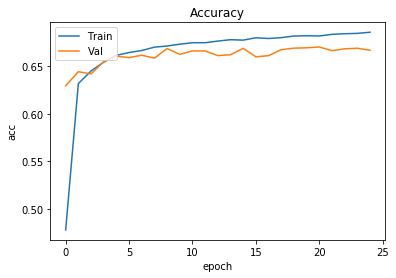

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [14]:
model = keras.Sequential()
model.add(keras.layers.Dense(148, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(74, activation='relu'))
model.add(keras.layers.Dense(74, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(18, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=25, batch_size=1000)

Train on 117264 samples, validate on 39088 samples
Epoch 1/25
117264/117264 [==============================] - 1s 13us/sample - loss: 1.3018 - acc: 0.5046 - val_loss: 0.9763 - val_acc: 0.6148
Epoch 2/25
117264/117264 [==============================] - 1s 8us/sample - loss: 0.9478 - acc: 0.6144 - val_loss: 1.0274 - val_acc: 0.5768
Epoch 3/25
117264/117264 [==============================] - 1s 8us/sample - loss: 0.9055 - acc: 0.6262 - val_loss: 0.9009 - val_acc: 0.6251
Epoch 4/25
117264/117264 [==============================] - 1s 8us/sample - loss: 0.8798 - acc: 0.6329 - val_loss: 0.9006 - val_acc: 0.6189
Epoch 5/25
117264/117264 [==============================] - 1s 9us/sample - loss: 0.8555 - acc: 0.6406 - val_loss: 0.8510 - val_acc: 0.6437
Epoch 6/25
117264/117264 [==============================] - 1s 8us/sample - loss: 0.8384 - acc: 0.6458 - val_loss: 0.8570 - val_acc: 0.6348
Epoch 7/25
117264/117264 [==============================] - 1s 8us/sample - loss: 0.8241 - acc: 0.6499 - val

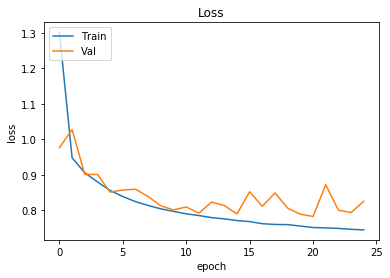

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

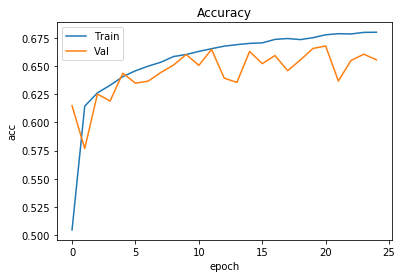

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [17]:
model = keras.Sequential()
model.add(keras.layers.Dense(148, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
keras.layers.Dropout(0.7, noise_shape=(1000, 1, 64), seed=19)
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
keras.layers.Dropout(0.3, noise_shape=(1000, 1, 37), seed=37)
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10, batch_size=500)

Train on 117264 samples, validate on 39088 samples
Epoch 1/10
117264/117264 [==============================] - 3s 26us/sample - loss: 1.2656 - acc: 0.5030 - val_loss: 0.9657 - val_acc: 0.6229
Epoch 2/10
117264/117264 [==============================] - 2s 18us/sample - loss: 0.8922 - acc: 0.6415 - val_loss: 0.8515 - val_acc: 0.6508
Epoch 3/10
117264/117264 [==============================] - 2s 18us/sample - loss: 0.8246 - acc: 0.6588 - val_loss: 0.8043 - val_acc: 0.6595
Epoch 4/10
117264/117264 [==============================] - 2s 18us/sample - loss: 0.7934 - acc: 0.6662 - val_loss: 0.8121 - val_acc: 0.6567
Epoch 5/10
117264/117264 [==============================] - 2s 18us/sample - loss: 0.7793 - acc: 0.6708 - val_loss: 0.8046 - val_acc: 0.6623
Epoch 6/10
117264/117264 [==============================] - 2s 18us/sample - loss: 0.7690 - acc: 0.6731 - val_loss: 0.7901 - val_acc: 0.6658
Epoch 7/10
117264/117264 [==============================] - 2s 19us/sample - loss: 0.7636 - acc: 0.6757

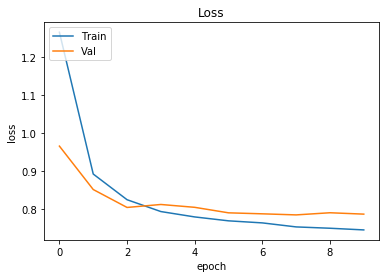

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

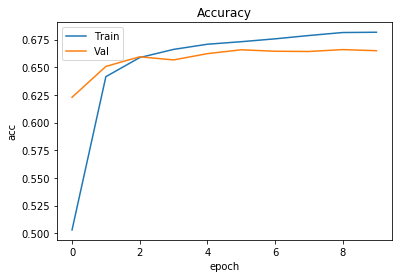

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [20]:
model = keras.Sequential()
model.add(keras.layers.Dense(148, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
keras.layers.Dropout(0.3, noise_shape=(1000, 1, 64), seed=19)
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
keras.layers.Dropout(0.15, noise_shape=(1000, 1, 37), seed=37)
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=10)

Train on 117264 samples, validate on 39088 samples
Epoch 1/10
117264/117264 [==============================] - 17s 145us/sample - loss: 0.9907 - acc: 0.6104 - val_loss: 0.8882 - val_acc: 0.6424
Epoch 2/10
117264/117264 [==============================] - 16s 135us/sample - loss: 0.8419 - acc: 0.6528 - val_loss: 0.8111 - val_acc: 0.6601
Epoch 3/10
117264/117264 [==============================] - 16s 135us/sample - loss: 0.8135 - acc: 0.6607 - val_loss: 0.8071 - val_acc: 0.6591
Epoch 4/10
117264/117264 [==============================] - 16s 138us/sample - loss: 0.7973 - acc: 0.6653 - val_loss: 0.8158 - val_acc: 0.6563
Epoch 5/10
117264/117264 [==============================] - 17s 143us/sample - loss: 0.7863 - acc: 0.6669 - val_loss: 0.7963 - val_acc: 0.6655
Epoch 6/10
117264/117264 [==============================] - 16s 136us/sample - loss: 0.7764 - acc: 0.6701 - val_loss: 0.8012 - val_acc: 0.6642
Epoch 7/10
117264/117264 [==============================] - 16s 135us/sample - loss: 0.7672

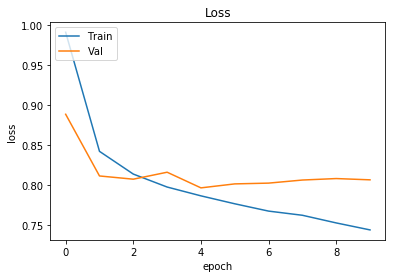

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

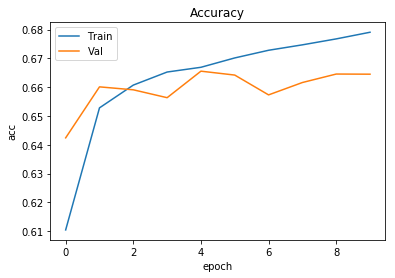

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [80]:
scores = modelDef.evaluate(X_test, y_test)

39088/39088 [==============================] - ETA: 0s - loss: 0.7744 - acc: 0.671 - 1s 36us/sample - loss: 0.7740 - acc: 0.6718


In [82]:
modelDef.save('model_TrumpSelection.h5')

(37,)